In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy.interpolate import make_interp_spline
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import silhouette_score
df=pd.read_csv(r'Irish_DataSet\outlierFixedDataAllMeter.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Month", 2: "Time", 3: "Consumption"},inplace=True)
unique_meter_ids = df['ID'].unique()
np.random.shuffle(unique_meter_ids)
meter_ids = unique_meter_ids[:20]

## summer

In [44]:
summer = []

for meter_id in meter_ids:
    meter_data = df[df['ID'] == meter_id] 
    meter_data = meter_data[(meter_data['Month'] >= 195) & (meter_data['Month'] <= 244)] 
    num_values_to_keep = 1500
    meter_data = meter_data['Consumption'].values[:num_values_to_keep]
    summer.append(meter_data)

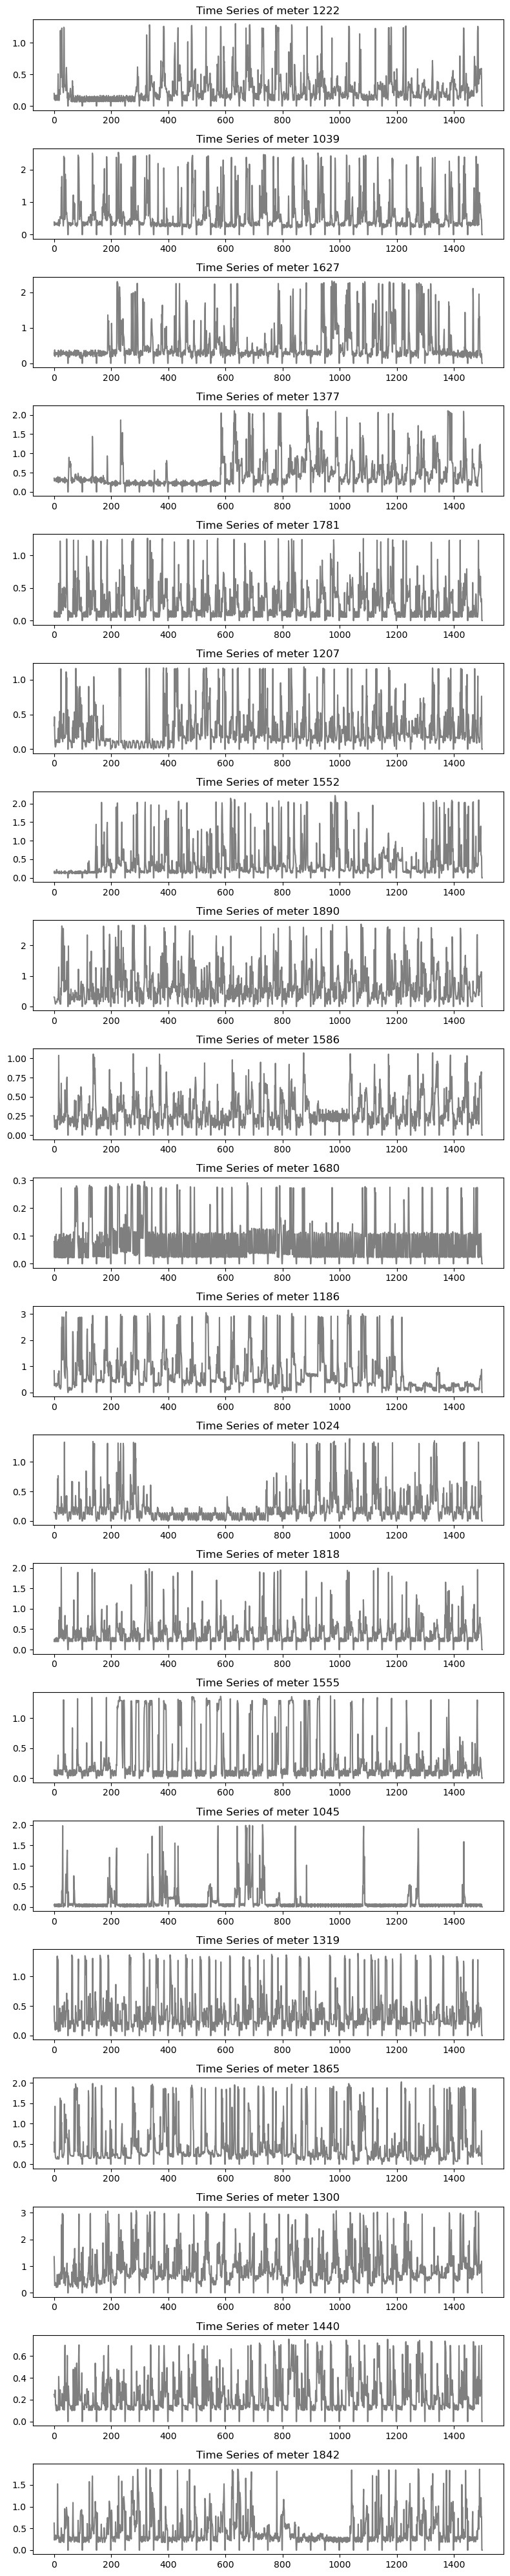

In [45]:
fig, axs = plt.subplots(len(summer), 1, figsize=(8, 2 * len(summer))) 

for yi in range(len(summer)):
    axs[yi].plot(summer[yi].ravel(), "k-", alpha=0.5)
    axs[yi].set_title(f"Time Series of meter {meter_ids[yi]}")
plt.tight_layout()
plt.show()

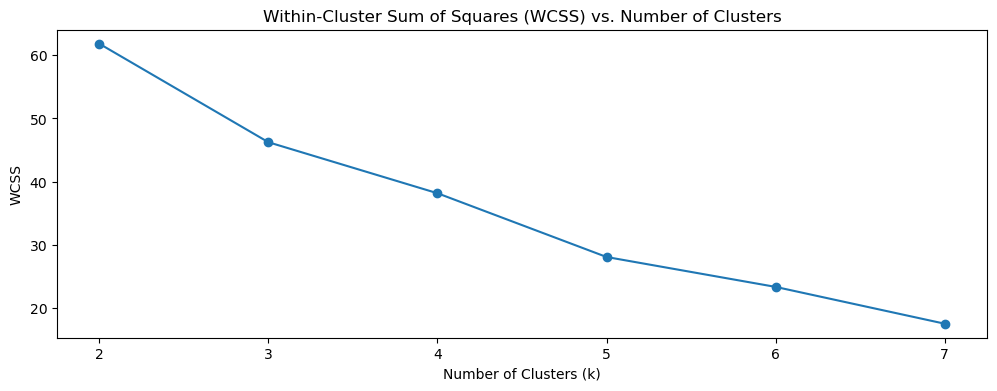

In [17]:
wcss = []
K = range(2, 8)

for k in K:
    km = TimeSeriesKMeans(n_clusters=k, n_init=2, metric="dtw", verbose=False, max_iter_barycenter=10, random_state=0, max_iter=100)
    km.fit(summer)
    wcss.append(km.inertia_)
    
# Plot the WCSS values to find the optimal 'k'
plt.figure(figsize=(12, 4)) 
plt.plot(K, wcss, marker='o')
plt.title("Within-Cluster Sum of Squares (WCSS) vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [46]:
k = 2
km = TimeSeriesKMeans(n_clusters=k, n_init=2, metric="dtw", verbose=False, max_iter_barycenter=10, random_state=0)
cluster_labels = km.fit_predict(summer)
cluster_labels 

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [47]:
silhouette_avg = silhouette_score(summer, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import davies_bouldin_score
davies_bouldin_index = davies_bouldin_score(summer, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Silhouette Score: 0.319214230732735
Davies-Bouldin Index: 1.7907715315284791


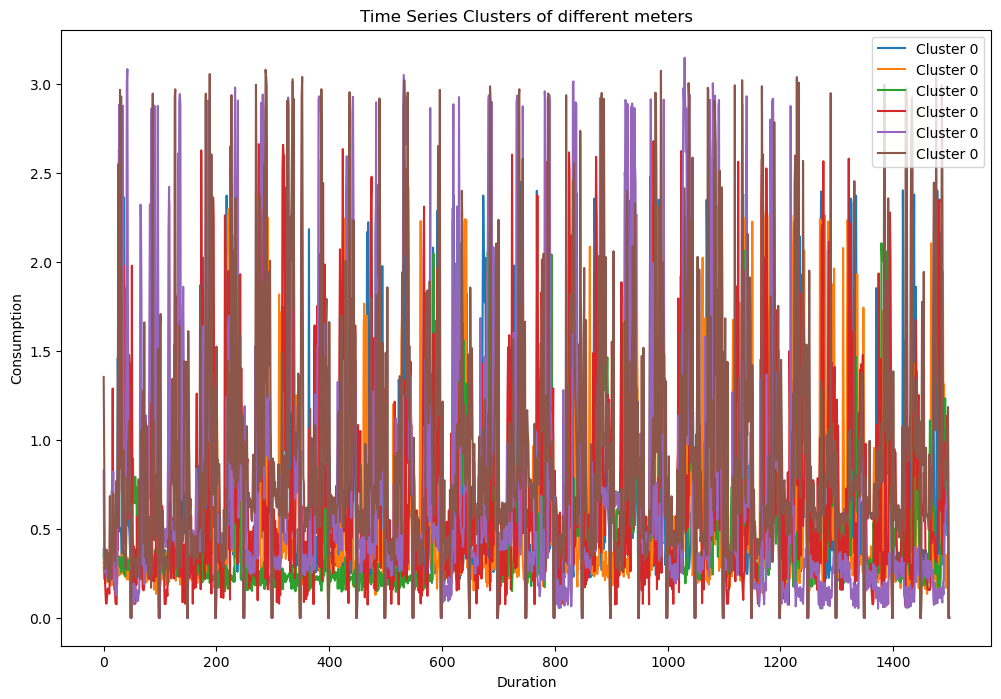

In [49]:
clusters_to_plot = [0]  
plt.figure(figsize=(12, 8))

# Create a scatter plot with different colors for each cluster
for label in clusters_to_plot:
    cluster_data = [summer[i] for i in range(len(summer)) if cluster_labels[i] == label]
    for series in cluster_data:
        plt.plot(series, label=f'Cluster {label}')

plt.title("Time Series Clusters of different meters")
plt.xlabel("Duration")  
plt.ylabel("Consumption") 
plt.legend()
plt.show()

## autumn

In [50]:
autumn = []

for meter_id in meter_ids:
    meter_data = df[df['ID'] == meter_id] 
    meter_data = meter_data[(meter_data['Month'] >= 245) & (meter_data['Month'] <= 338)] 
    num_values_to_keep = 1500
    meter_data = meter_data['Consumption'].values[:num_values_to_keep]
    autumn.append(meter_data)

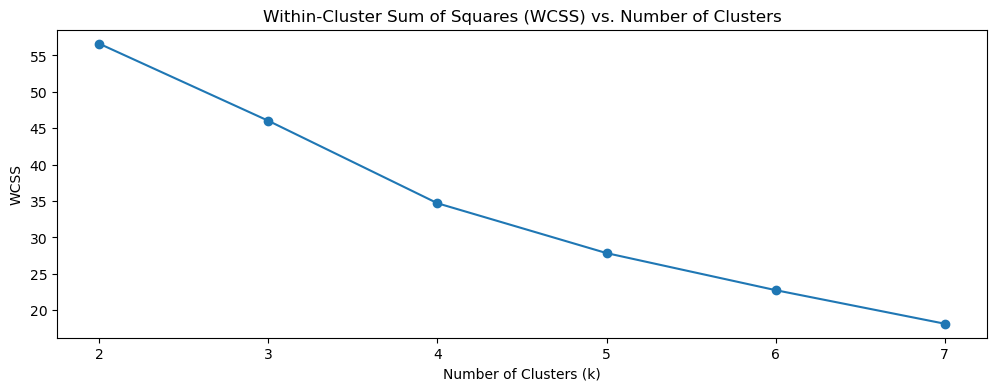

In [3]:
wcss = []
K = range(2, 8)

for k in K:
    km = TimeSeriesKMeans(n_clusters=k, n_init=2, metric="dtw", verbose=False, max_iter_barycenter=10, random_state=0, max_iter=100)
    km.fit(autumn)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(12, 4)) 
plt.plot(K, wcss, marker='o')
plt.title("Within-Cluster Sum of Squares (WCSS) vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [51]:
k = 2
km = TimeSeriesKMeans(n_clusters=k, n_init=2, metric="dtw", verbose=False, max_iter_barycenter=10, random_state=0)
cluster_labels = km.fit_predict(autumn)
cluster_labels 

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [52]:
silhouette_avg = silhouette_score(autumn, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import davies_bouldin_score
davies_bouldin_index = davies_bouldin_score(autumn, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Silhouette Score: 0.3330192577656991
Davies-Bouldin Index: 1.9313388468160126


## winter

In [53]:
winter = []

for meter_id in meter_ids:
    meter_data = df[df['ID'] == meter_id] 
    meter_data = meter_data[(meter_data['Month'] >= 339) & (meter_data['Month'] <= 438)] 
    num_values_to_keep = 1500
    meter_data = meter_data['Consumption'].values[:num_values_to_keep]
    winter.append(meter_data)

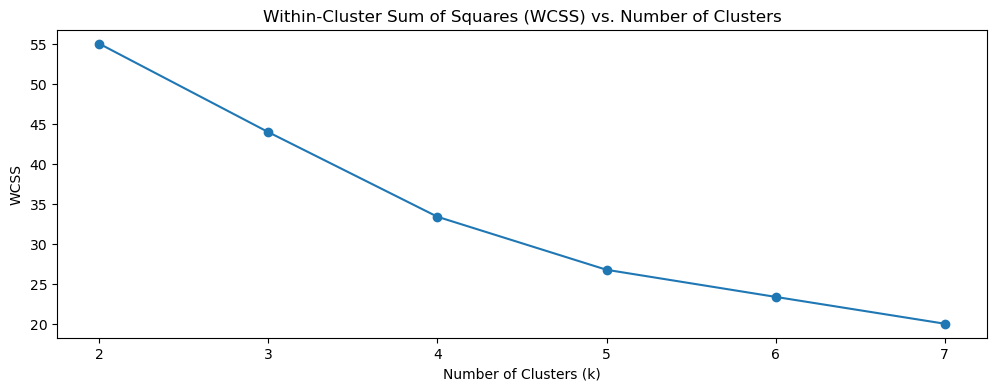

In [21]:
wcss = []
K = range(2, 8)

for k in K:
    km = TimeSeriesKMeans(n_clusters=k, n_init=2, metric="dtw", verbose=False, max_iter_barycenter=10, random_state=0, max_iter=100)
    km.fit(winter)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(12, 4)) 
plt.plot(K, wcss, marker='o')
plt.title("Within-Cluster Sum of Squares (WCSS) vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [54]:
k = 2
km = TimeSeriesKMeans(n_clusters=k, n_init=2, metric="dtw", verbose=False, max_iter_barycenter=10, random_state=0)
cluster_labels = km.fit_predict(winter)
cluster_labels 

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [55]:
silhouette_avg = silhouette_score(winter, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import davies_bouldin_score
davies_bouldin_index = davies_bouldin_score(winter, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Silhouette Score: 0.37891248729583066
Davies-Bouldin Index: 1.3983163406435286


## spring

In [37]:
spring = []

for meter_id in meter_ids:
    meter_data = df[df['ID'] == meter_id] 
    meter_data = meter_data[(meter_data['Month'] >= 432) & (meter_data['Month'] <= 526)] 
    num_values_to_keep = 1500
    meter_data = meter_data['Consumption'].values[:num_values_to_keep]
    spring.append(meter_data)

In [38]:
wcss = []
K = range(2, 8)

for k in K:
    km = TimeSeriesKMeans(n_clusters=k, n_init=2, metric="dtw", verbose=False, max_iter_barycenter=10, random_state=0, max_iter=100)
    km.fit(spring)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(12, 4)) 
plt.plot(K, wcss, marker='o')
plt.title("Within-Cluster Sum of Squares (WCSS) vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [ ]:
k = 3
km = TimeSeriesKMeans(n_clusters=k, n_init=2, metric="dtw", verbose=False, max_iter_barycenter=10, random_state=0)
cluster_labels = km.fit_predict(spring)

silhouette_avg = silhouette_score(spring, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import davies_bouldin_score
davies_bouldin_index = davies_bouldin_score(spring, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")